## T-20 Cricket World Cup 2022 Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("T-20 World cup 2022.csv")

In [2]:
# Summary statistics
print(data.describe())

          comment_id      match_id   innings_id         over         ball  \
count    9814.000000  9.814000e+03  9814.000000  9814.000000  9814.000000   
mean    85399.661708  1.298157e+06     1.477787    10.082841     3.486856   
std     78951.670137  1.355630e+01     0.499532     5.623045     1.707484   
min       110.000000  1.298135e+06     1.000000     1.000000     1.000000   
25%     18030.000000  1.298145e+06     1.000000     5.000000     2.000000   
50%     29010.000000  1.298157e+06     1.000000    10.000000     3.000000   
75%    118040.000000  1.298169e+06     2.000000    15.000000     5.000000   
max    219090.000000  1.298179e+06     2.000000    20.000000     6.000000   

              runs   batsman1_id  batsman1_runs  batsman1_balls    bowler1_id  \
count  9814.000000  9.814000e+03    9814.000000     9814.000000  9.814000e+03   
mean      1.202262  5.377303e+05      15.691971       13.249440  6.226676e+05   
std       1.476730  3.181419e+05      16.454378       11.471307

In [3]:
# Check for missing values
print(data.isnull().sum())

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

In [4]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

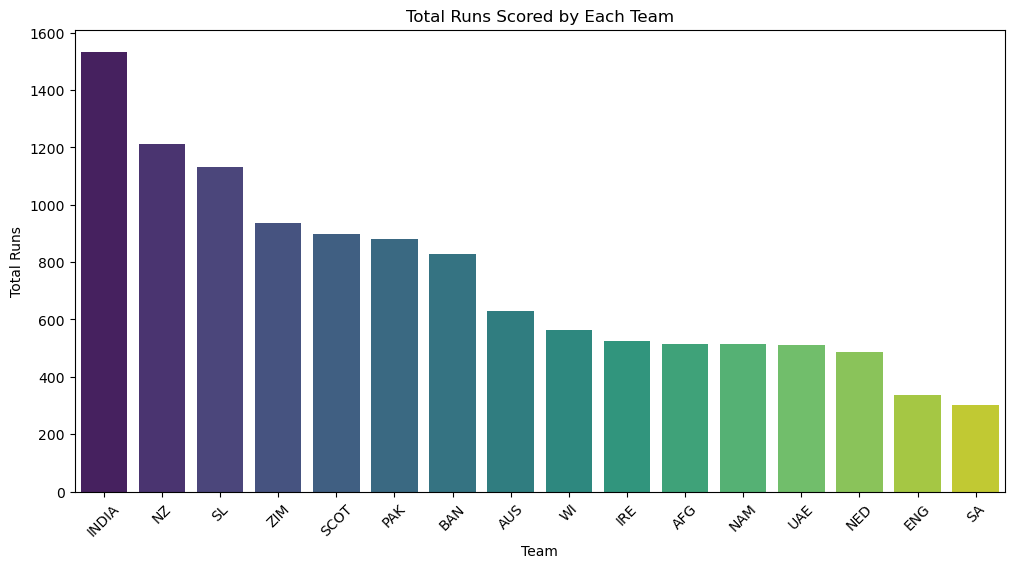

In [5]:
# Team Performance Analysis
team_performance = data.groupby('home_team')['runs'].sum().reset_index()
team_performance = team_performance.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='home_team', y='runs', data=team_performance, palette='viridis')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

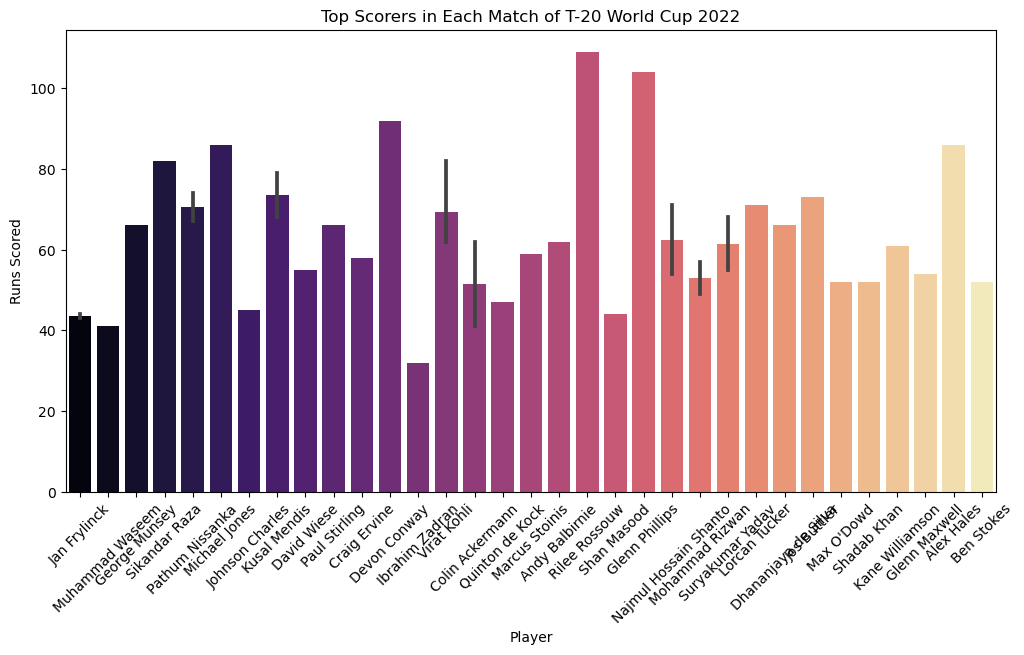

In [6]:
# Group data by match ID and find the top scorer in each match
top_scorers_per_match = data.groupby('match_id').apply(lambda x: x.loc[x['batsman1_runs'].idxmax()])

plt.figure(figsize=(12, 6))
sns.barplot(x='batsman1_name', y='batsman1_runs', data=top_scorers_per_match, palette='magma')
plt.title('Top Scorers in Each Match of T-20 World Cup 2022')
plt.xlabel('Player')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.show()

In [7]:
# strike rate of the top batsmen based on the total runs and total balls faced throughout the tournament. 
# It doesn't consider individual matches.
# Batting performance analysis: Strike rate of top batsmen
top_batsmen = data.groupby('batsman1_name').agg({'batsman1_runs': 'sum', 'batsman1_balls': 'sum'}).reset_index()
top_batsmen.rename(columns={'batsman1_runs': 'Total Runs', 'batsman1_balls': 'Total Balls'}, inplace=True)
top_batsmen['Strike Rate'] = (top_batsmen['Total Runs'] / top_batsmen['Total Balls']) * 100
top_batsmen = top_batsmen.sort_values(by='Total Runs', ascending=False).head(10)

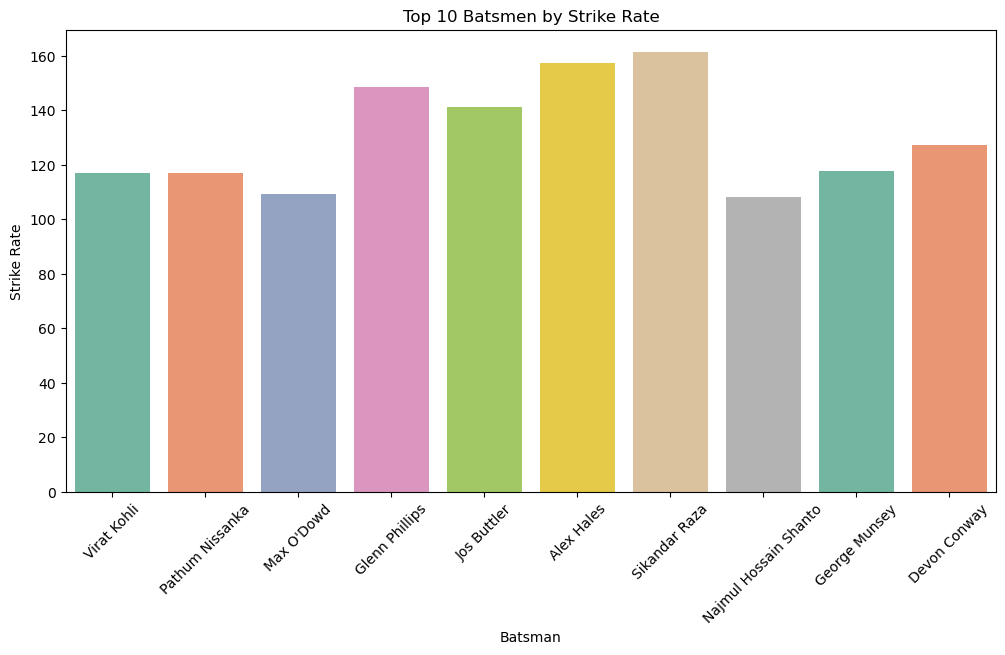

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman1_name', y='Strike Rate', data=top_batsmen, palette='Set2')
plt.title('Top 10 Batsmen by Strike Rate')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Add a new column 'is_wicket' to mark rows where a wicket is taken
data['is_wicket'] = data['shortText'].str.endswith('OUT')

In [10]:
# Group the data by bowler and count the number of wickets each bowler has taken
wickets_count = data[data['is_wicket']].groupby('bowler1_name').size().reset_index(name='wickets')

In [11]:
# Sort the dataframe by the number of wickets in descending order
wickets_count = wickets_count.sort_values(by='wickets', ascending=False)

In [12]:
# Select top 10 wicket-takers
top_10_wicket_takers = wickets_count.head(10)

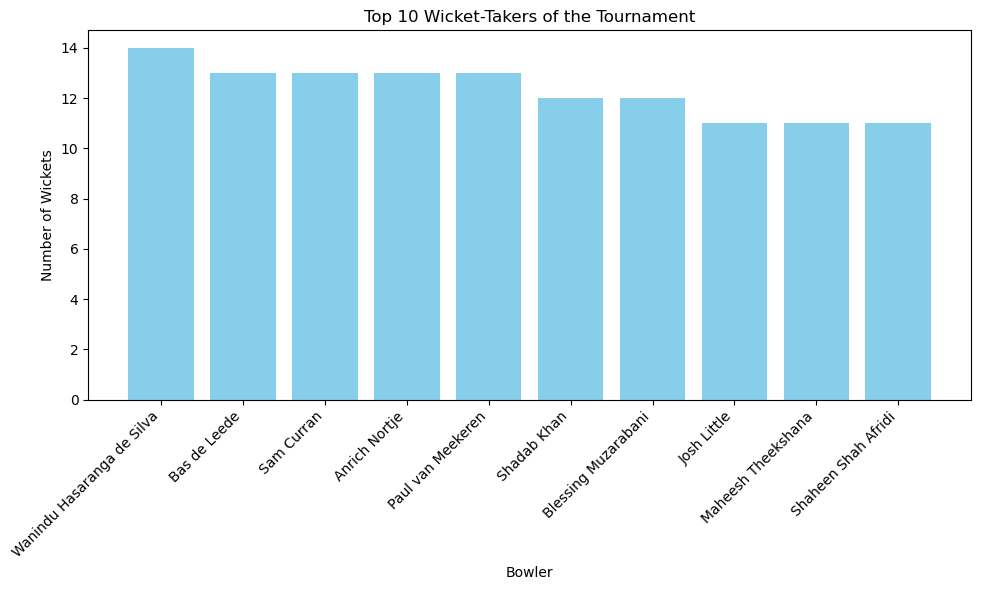

In [13]:
# Plotting the top 10 wicket-takers as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_wicket_takers['bowler1_name'], top_10_wicket_takers['wickets'], color='skyblue')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Wicket-Takers of the Tournament')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Add new columns 'is_four' and 'is_six' to mark rows where a four or six is scored
data['is_four'] = data['shortText'].str.contains('FOUR')
data['is_six'] = data['shortText'].str.contains('SIX')

In [15]:
# Group the data by batsman and count the number of fours and sixes each batsman has scored
fours_count = data[data['is_four']].groupby('batsman1_name').size().reset_index(name='fours')
sixes_count = data[data['is_six']].groupby('batsman1_name').size().reset_index(name='sixes')

In [16]:
# Merge fours and sixes count dataframes
batsmen_stats = fours_count.merge(sixes_count, on='batsman1_name', how='outer').fillna(0)

In [17]:
# Calculate total runs scored by each batsman
total_runs = data.groupby('batsman1_name')['runs'].sum().reset_index()
total_runs.rename(columns={'runs': 'total_runs'}, inplace=True)

In [18]:
# Merge total runs dataframe
batsmen_stats = batsmen_stats.merge(total_runs, on='batsman1_name')

In [19]:
# Calculate strike rate for each batsman
batsmen_stats['strike_rate'] = (batsmen_stats['total_runs'] / data.groupby('batsman1_name')['ball'].count()) * 100

In [20]:
# Sort the dataframe by the number of fours and sixes in descending order
batsmen_stats = batsmen_stats.sort_values(by=['fours', 'sixes'], ascending=False)

In [21]:
# Select top 10 batsmen with most fours and sixes
top_10_batsmen = batsmen_stats.head(10)

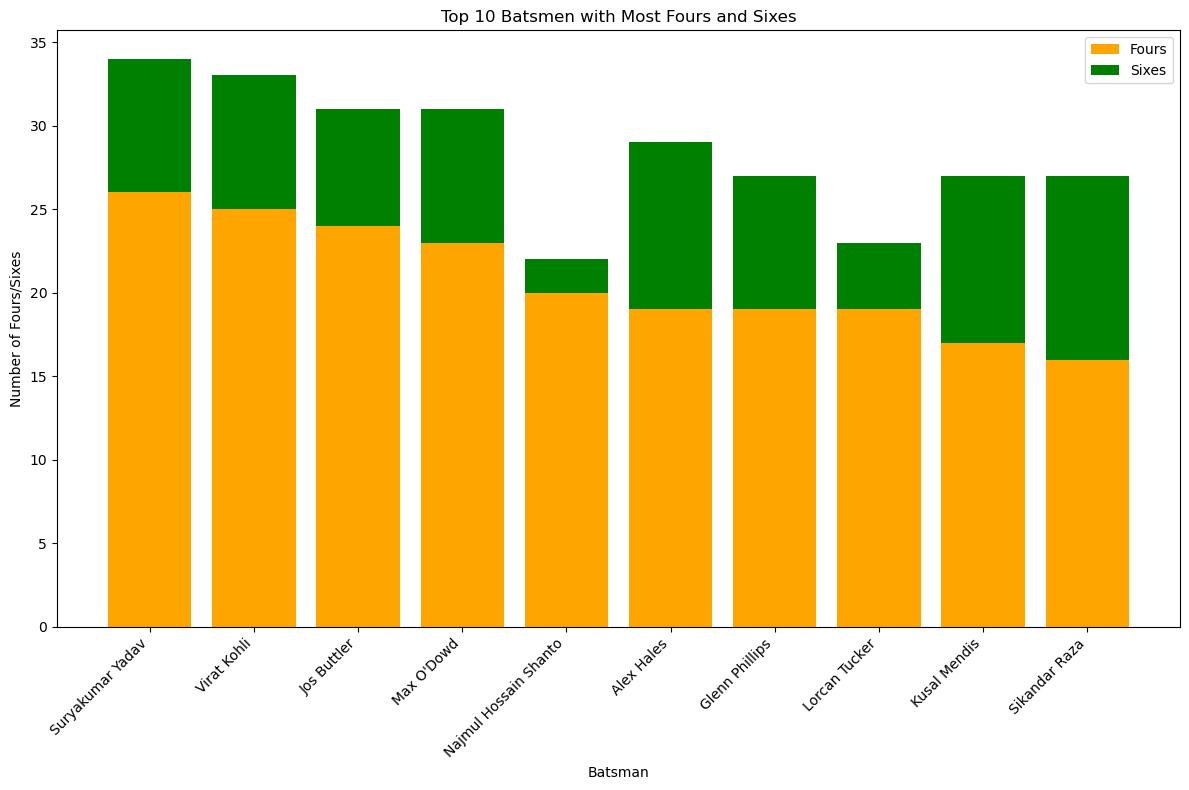

In [22]:
# Plotting the top 10 batsmen with most fours and sixes as a bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_10_batsmen['batsman1_name'], top_10_batsmen['fours'], color='orange', label='Fours')
plt.bar(top_10_batsmen['batsman1_name'], top_10_batsmen['sixes'], bottom=top_10_batsmen['fours'], color='green', label='Sixes')
plt.xlabel('Batsman')
plt.ylabel('Number of Fours/Sixes')
plt.title('Top 10 Batsmen with Most Fours and Sixes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Maximum wides and no-balls by a bowler
max_wides = data.groupby('bowler1_name')['isWide'].sum().max()
max_no_balls = data.groupby('bowler1_name')['isNoball'].sum().max()

In [24]:
print("Maximum wides by a bowler:", max_wides)
print("Maximum no-balls by a bowler:", max_no_balls)

Maximum wides by a bowler: 17
Maximum no-balls by a bowler: 4


In [40]:
# calculates the strike rate of batsmen based on runs scored and balls faced in each match. 
# It provides a more granular view of the batsmen's performance in each match.
# Group data by batsman name and match ID to get unique instances of each batsman in each match
batsmen_stats = pd.DataFrame()
batsmen_stats['batsman'] = data['batsman1_name'].unique()
batsmen_stats['runs'] = data.groupby(['batsman1_name', 'match_id'])['runs'].sum().groupby('batsman1_name').sum().values
batsmen_stats['balls'] = data.groupby(['batsman1_name', 'match_id'])['ball'].count().groupby('batsman1_name').sum().values

# Calculate strike rate
batsmen_stats['strike_rate'] = (batsmen_stats['runs'] / batsmen_stats['balls']) * 100

print("\nBatsmen Statistics:")
print(batsmen_stats)


Batsmen Statistics:
                  batsman  runs  balls  strike_rate
0         Mohammad Rizwan   128    107   119.626168
1              Babar Azam    25     29    86.206897
2          Mohammad Haris     1      3    33.333333
3             Shan Masood   108     81   133.333333
4          Iftikhar Ahmed   105     80   131.250000
..                    ...   ...    ...          ...
192         Divan la Cock   120     89   134.831461
193        Alzarri Joseph     5      9    55.555556
194            Obed McCoy     1      1   100.000000
195           Zawar Farid     2      3    66.666667
196  Danushka Gunathilaka     2      4    50.000000

[197 rows x 4 columns]


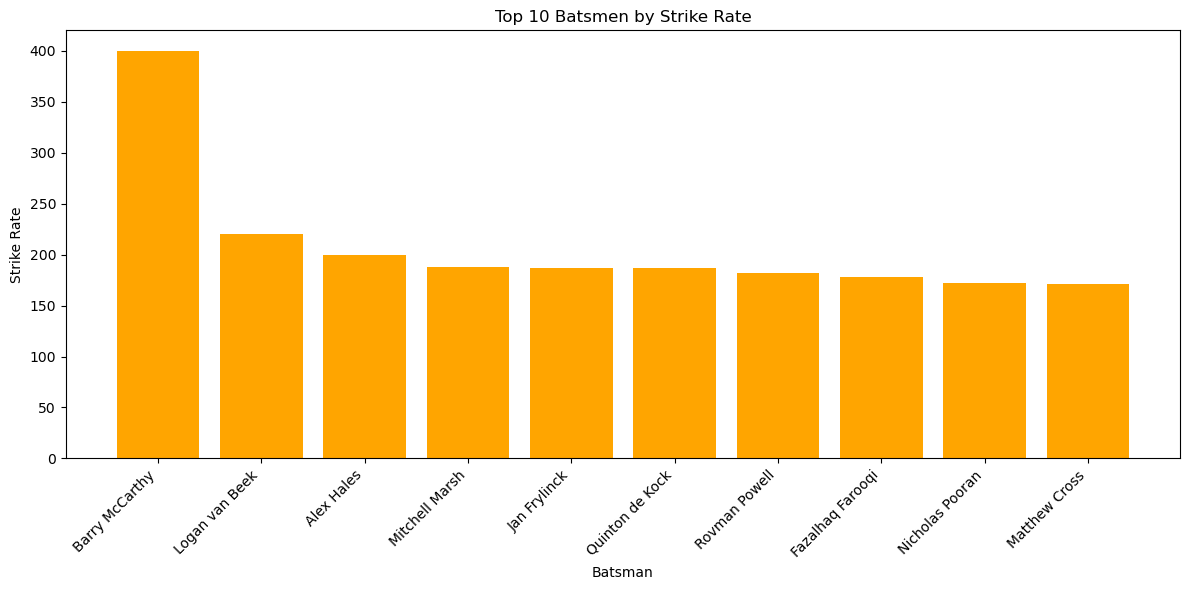

In [44]:
# Selecting the top 10 batsmen based on strike rate
top_10_batsmen = batsmen_stats.nlargest(10, 'strike_rate')

# Plotting the top 10 batsmen statistics
plt.figure(figsize=(12, 6))

# Bar chart for strike rate
plt.bar(top_10_batsmen['batsman'], top_10_batsmen['strike_rate'], color='orange')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.title('Top 10 Batsmen by Strike Rate')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [37]:
file_path = "batsman_statistics.xlsx"

# Save the DataFrame to an Excel file
batsmen_stats.to_excel(file_path, index=False)

print("Batsman statistics saved to Excel file:", file_path)

Batsman statistics saved to Excel file: batsman_statistics.xlsx


In [39]:
# Group data by bowler name and match ID to get unique instances of each bowler in each match
bowlers_stats = pd.DataFrame()
bowlers_stats['bowler'] = data['bowler1_name'].unique()
bowlers_stats['runs'] = data.groupby(['bowler1_name', 'match_id'])['runs'].sum().groupby('bowler1_name').sum().values
bowlers_stats['wickets'] = data.groupby(['bowler1_name', 'match_id'])['wicket_id'].count().groupby('bowler1_name').sum().values
bowlers_stats['overs'] = data.groupby(['bowler1_name', 'match_id'])['over'].nunique().groupby('bowler1_name').sum().values

# Calculate average (handling cases where wickets are zero)
bowlers_stats['average'] = bowlers_stats['runs'] / bowlers_stats['wickets'].replace(0, 1)

# Calculate strike rate (handling cases where wickets are zero)
bowlers_stats['strike_rate'] = (bowlers_stats['overs'] * 6) / bowlers_stats['wickets'].replace(0, 1)

print("\nBowlers Statistics:")
print(bowlers_stats)


Bowlers Statistics:
                     bowler  runs  wickets  overs    average  strike_rate
0                Ben Stokes    38        3      8  12.666667         16.0
1              Chris Woakes    80        6     12  13.333333         12.0
2                Sam Curran   149        5     24  29.800000         28.8
3               Adil Rashid    11        1      1  11.000000          6.0
4              Chris Jordan     9        0      1   9.000000          6.0
..                      ...   ...      ...    ...        ...          ...
127             Aryan Lakra   103        6     16  17.166667         16.0
128     Dushmantha Chameera    12        0      2  12.000000         12.0
129         Gerhard Erasmus    25        0      3  25.000000         18.0
130  Jan Nicol Loftie-Eaton    59        5     12  11.800000         14.4
131             Zawar Farid    25        0      3  25.000000         18.0

[132 rows x 6 columns]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Logan van Beek'),
  Text(1, 0, 'Soumya Sarkar'),
  Text(2, 0, 'Sikandar Raza'),
  Text(3, 0, 'Charith Asalanka'),
  Text(4, 0, 'Haris Rauf'),
  Text(5, 0, 'Tendai Chatara'),
  Text(6, 0, 'Chris Jordan'),
  Text(7, 0, 'Brad Evans'),
  Text(8, 0, 'Fazalhaq Farooqi'),
  Text(9, 0, 'Adil Rashid')])

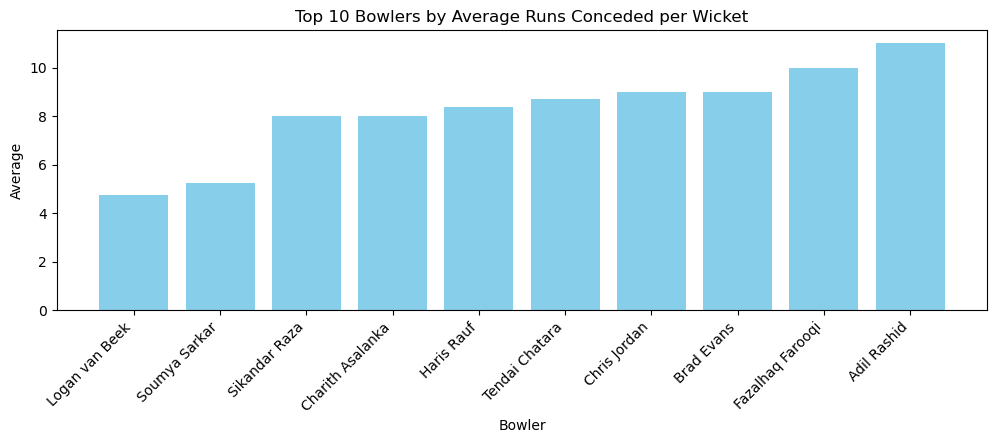

In [43]:
# Selecting the top 10 bowlers based on average runs conceded per wicket
top_10_bowlers = bowlers_stats.nsmallest(10, 'average')

# Plotting the top 10 bowlers statistics
plt.figure(figsize=(12, 8))

# Bar chart for average
plt.subplot(2, 1, 1)
plt.bar(top_10_bowlers['bowler'], top_10_bowlers['average'], color='skyblue')
plt.xlabel('Bowler')
plt.ylabel('Average')
plt.title('Top 10 Bowlers by Average Runs Conceded per Wicket')
plt.xticks(rotation=45, ha='right')

In [41]:
# Calculate total runs conceded through wides for each bowler
wides_runs = data.groupby('bowler1_name')['isWide'].sum().reset_index()
wides_runs.columns = ['Bowler', 'Wides_Runs']

In [31]:
# Calculate total runs conceded through no-balls for each bowler
no_balls_runs = data.groupby('bowler1_name')['isNoball'].sum().reset_index()
no_balls_runs.columns = ['Bowler', 'No_Balls_Runs']

In [32]:
# Merge the two dataframes to get combined runs conceded by each bowler
combined_runs = pd.merge(wides_runs, no_balls_runs, on='Bowler')

In [33]:
# Calculate total runs conceded (wides + no-balls)
combined_runs['Total_Runs'] = combined_runs['Wides_Runs'] + combined_runs['No_Balls_Runs']

In [34]:
# Sort bowlers based on total runs conceded and get top 10 for wides and no-balls
top_10_wides = combined_runs.sort_values(by='Wides_Runs', ascending=False).head(10)
top_10_no_balls = combined_runs.sort_values(by='No_Balls_Runs', ascending=False).head(10)

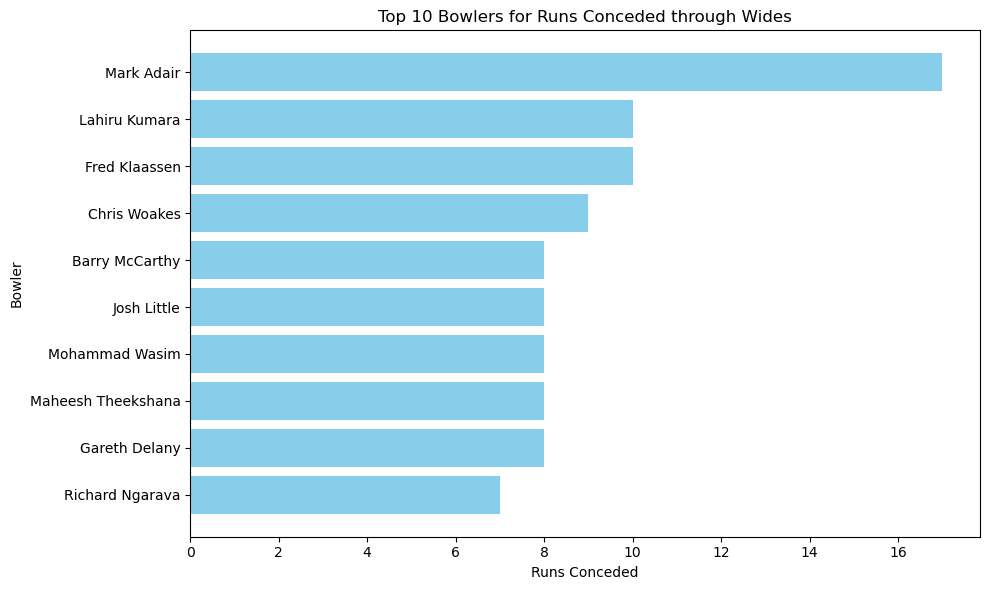

In [35]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot for top 10 bowlers for wides
plt.barh(top_10_wides['Bowler'], top_10_wides['Wides_Runs'], color='skyblue')
plt.xlabel('Runs Conceded')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers for Runs Conceded through Wides')
plt.gca().invert_yaxis()  # Invert y-axis to display top bowler at the top
plt.tight_layout()
plt.show()

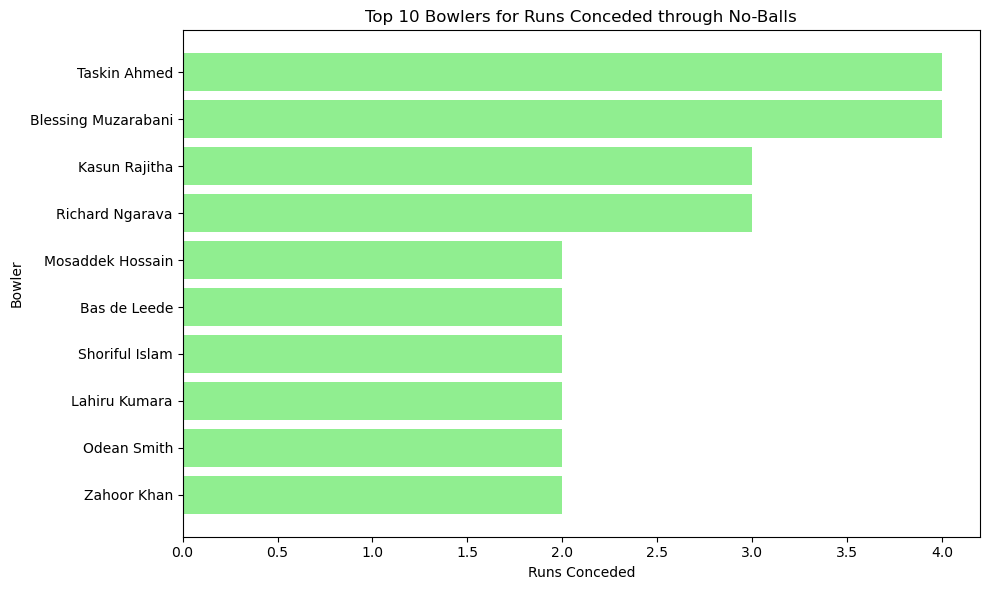

In [36]:
# Plot for top 10 bowlers for no-balls
plt.figure(figsize=(10, 6))
plt.barh(top_10_no_balls['Bowler'], top_10_no_balls['No_Balls_Runs'], color='lightgreen')
plt.xlabel('Runs Conceded')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers for Runs Conceded through No-Balls')
plt.gca().invert_yaxis()  # Invert y-axis to display top bowler at the top
plt.tight_layout()
plt.show()

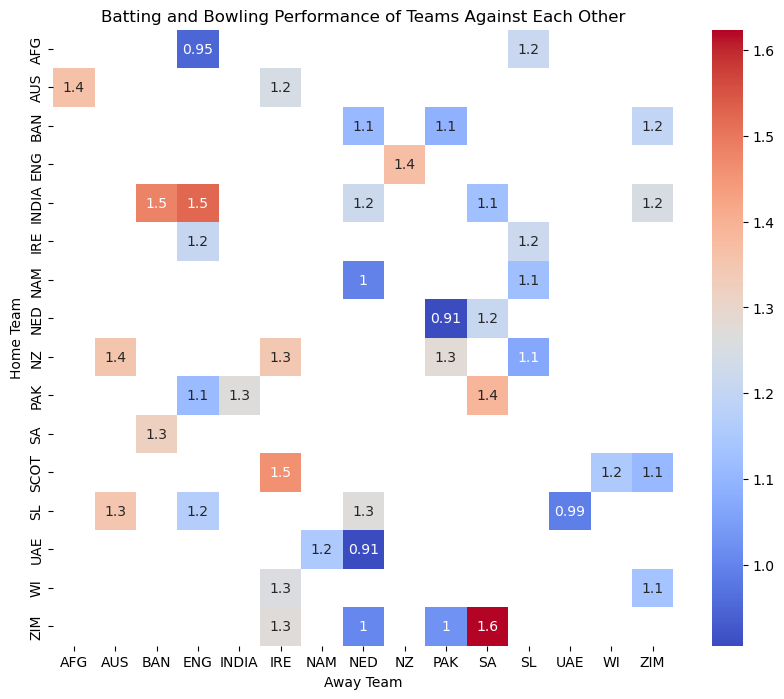

In [45]:
# Heatmap showing batting and bowling performance of teams against each other
batting_bowling_performance = data.pivot_table(index='home_team', columns='away_team', values='runs', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(batting_bowling_performance, annot=True, cmap='coolwarm')
plt.title('Batting and Bowling Performance of Teams Against Each Other')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.show()